### Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime

### Reading the data

In [2]:
data = pd.read_csv('data/SCMS_Dataset.csv')
data.head()

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Checking the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7879 entries, 0 to 7878
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Project Code                  7879 non-null   object 
 1   PQ #                          7879 non-null   object 
 2   PO / SO #                     7879 non-null   object 
 3   ASN/DN #                      7879 non-null   object 
 4   Country                       7879 non-null   object 
 5   Managed By                    7879 non-null   object 
 6   Fulfill Via                   7879 non-null   object 
 7   Vendor INCO Term              7879 non-null   object 
 8   Shipment Mode                 7619 non-null   object 
 9   PQ First Sent to Client Date  7879 non-null   object 
 10  PO Sent to Vendor Date        7879 non-null   object 
 11  Scheduled Delivery Date       7879 non-null   object 
 12  Delivered to Client Date      7879 non-null   object 
 13  Del

In [4]:
data.dtypes

Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64
Line Item Value                 float64


### Data Cleaning

Dropping columns which are not required for the analysis

In [5]:
data = data.drop(['Item Description', 'Molecule/Test Type'], axis=1)

In [6]:
data.shape

(7879, 30)

### Filtering data

In [8]:
data = data[data['Weight (Kilograms)'] != 'Weight Captured Separately']

In [9]:
data = data[data['Freight Cost (USD)'] != 'Freight Included in Commodity Cost']

In [10]:
data = data[data['Freight Cost (USD)'] != 'Invoiced Separately']

In [11]:
# Shape of data after filtering
data.shape

(6175, 30)

### Changing datatypes of Weight (Kilograms), Freight Cost (USD)

In [12]:
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'])
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'])

In [14]:
data[['Weight (Kilograms)', 'Freight Cost (USD)']].dtypes

Weight (Kilograms)      int64
Freight Cost (USD)    float64
dtype: object

### Handling date columns

In [16]:
data[['PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']]

,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date
0,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06
1,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06
2,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06
3,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06
4,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06
...,...,...,...,...,...
7871,10/17/2014,N/A - From RDC,29-May-15,9-Jun-15,15-Jun-15
7872,8/21/2014,N/A - From RDC,29-May-15,15-Jun-15,15-Jun-15
7873,11/3/2014,N/A - From RDC,30-Jun-15,4-Jun-15,15-Jun-15
7874,9/19/2014,N/A - From RDC,30-Jun-15,15-May-15,22-May-15


### Changing datatypes of the data columns

In [17]:
data[['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']].dtypes

Scheduled Delivery Date     object
Delivered to Client Date    object
Delivery Recorded Date      object
dtype: object

In [18]:
data['Scheduled Delivery Date'] = pd.to_datetime(data['Scheduled Delivery Date'])
data['Delivered to Client Date'] = pd.to_datetime(data['Delivered to Client Date'])
data['Delivery Recorded Date'] = pd.to_datetime(data['Delivery Recorded Date'])

In [19]:
data[['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']].dtypes

Scheduled Delivery Date     datetime64[ns]
Delivered to Client Date    datetime64[ns]
Delivery Recorded Date      datetime64[ns]
dtype: object

### Analysis

In [23]:
# Total no. of unique orders
orders = data['PO / SO #'].nunique() # 5572 orders
print('Total no. of orders:',orders);

# Total Orderlines 
orderlines = data['PO / SO #'].count() # 6175 orderlines
print('Total no. of orderlines:',orderlines);

# Total Projects
projects = data['Project Code'].nunique() # 130 projects
print('Total no. of projects:',projects);

# Total Freight cost
freight_cost = data['Freight Cost (USD)'].sum() #68687760.27
print('Total freight cost: $',freight_cost)

Total no. of orders: 5572
Total no. of orderlines: 6175
Total no. of projects: 130
Total freight cost: $ 68687760.27


### Freight Cost based on Country

In [32]:
country = data.groupby('Country').sum().reset_index()
country = country[['Country', 'Freight Cost (USD)']]

C:\Users\Zuhair Bhati\AppData\Local\Temp\ipykernel_9884\4112982999.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country = data.groupby('Country').sum().reset_index()


In [25]:
country

,Country,Freight Cost (USD)
0,Afghanistan,1081.05
1,Angola,32796.70
2,Benin,66015.17
3,Botswana,137930.17
4,Burundi,312042.32
5,Cameroon,1791260.62
6,"Congo, DRC",699082.91
7,Côte d'Ivoire,6092165.51
8,Dominican Republic,245864.58
9,Ethiopia,1991724.42


### Top 3 Countries based on Freight Cost (USD)

In [26]:
country.nlargest(3, 'Freight Cost (USD)')

,Country,Freight Cost (USD)
23,Nigeria,14227197.64
36,Zambia,6309186.49
7,Côte d'Ivoire,6092165.51


### Bottom 3 Countries based on Freight Cost (USD)

In [27]:
country.nsmallest(3, 'Freight Cost (USD)')

,Country,Freight Cost (USD)
0,Afghanistan,1081.05
26,Senegal,1444.63
12,Guinea,1804.20


### Freight Cost based on Country and Shipment mode

In [30]:
country_shipment = data.groupby(['Country', 'Shipment Mode']).sum().reset_index()
country_shipment = country_shipment[['Country', 'Shipment Mode', 'Freight Cost (USD)']]
country_shipment

C:\Users\Zuhair Bhati\AppData\Local\Temp\ipykernel_9884\1856881225.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_shipment = data.groupby(['Country', 'Shipment Mode']).sum().reset_index()


,Country,Shipment Mode,Freight Cost (USD)
0,Afghanistan,Air,1081.05
1,Angola,Air,30832.07
2,Angola,Truck,1964.63
3,Benin,Air,66015.17
4,Botswana,Air,133841.79
...,...,...,...
71,Zambia,Truck,2712772.79
72,Zimbabwe,Air,1534030.08
73,Zimbabwe,Air Charter,527163.62
74,Zimbabwe,Ocean,63459.07


### Freight Cost (USD), count of orders based on Country and Shipment Mode

In [33]:
country_summary = data.groupby(['Country', 'Shipment Mode']).agg({'PO / SO #': 'count', 'Freight Cost (USD)': 'sum'}).reset_index()
country_summary

,Country,Shipment Mode,PO / SO #,Freight Cost (USD)
0,Afghanistan,Air,2,1081.05
1,Angola,Air,5,30832.07
2,Angola,Truck,2,1964.63
3,Benin,Air,7,66015.17
4,Botswana,Air,58,133841.79
...,...,...,...,...
71,Zambia,Truck,263,2712772.79
72,Zimbabwe,Air,98,1534030.08
73,Zimbabwe,Air Charter,17,527163.62
74,Zimbabwe,Ocean,3,63459.07


### Total Freight Cost (USD) based on Country and Shipment Mode along with count of orders and cost of each order

In [34]:
country_summary['Freight_cost_per_order'] = country_summary['Freight Cost (USD)'] / country_summary['PO / SO #']
country_summary

,Country,Shipment Mode,PO / SO #,Freight Cost (USD),Freight_cost_per_order
0,Afghanistan,Air,2,1081.05,540.525000
1,Angola,Air,5,30832.07,6166.414000
2,Angola,Truck,2,1964.63,982.315000
3,Benin,Air,7,66015.17,9430.738571
4,Botswana,Air,58,133841.79,2307.617069
...,...,...,...,...,...
71,Zambia,Truck,263,2712772.79,10314.725437
72,Zimbabwe,Air,98,1534030.08,15653.368163
73,Zimbabwe,Air Charter,17,527163.62,31009.624706
74,Zimbabwe,Ocean,3,63459.07,21153.023333


### Freight Cost (USD) by Manufacturing Site

In [35]:
manufacturing_summary = data.groupby('Manufacturing Site').count().reset_index()
manufacturing_summary[['Manufacturing Site', 'Freight Cost (USD)']]

,Manufacturing Site,Freight Cost (USD)
0,ABBVIE (Abbott) France,6
1,ABBVIE (Abbott) Logis. UK,125
2,ABBVIE (Abbott) St. P'burg USA,2
3,ABBVIE GmbH & Co.KG Wiesbaden,34
4,ABBVIE Ludwigshafen Germany,277
...,...,...
70,"Standard Diagnostics, Korea",102
71,"Strides, Bangalore, India.",320
72,"Trinity Biotech, Plc",305
73,"Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸n...",1


### Top 5 Manufacturing Site by Freight Cost (USD)

In [36]:
manufacturing_summary[['Manufacturing Site', 'Freight Cost (USD)']].nlargest(5, 'Freight Cost (USD)')

,Manufacturing Site,Freight Cost (USD)
8,"Aurobindo Unit III, India",1691
52,Mylan (formerly Matrix) Nashik,895
29,Hetero Unit III Hyderabad IN,484
16,"Cipla, Goa, India",382
6,"Alere Medical Co., Ltd.",360


### Data Visualization
***
#### Freight Cost per order by Country

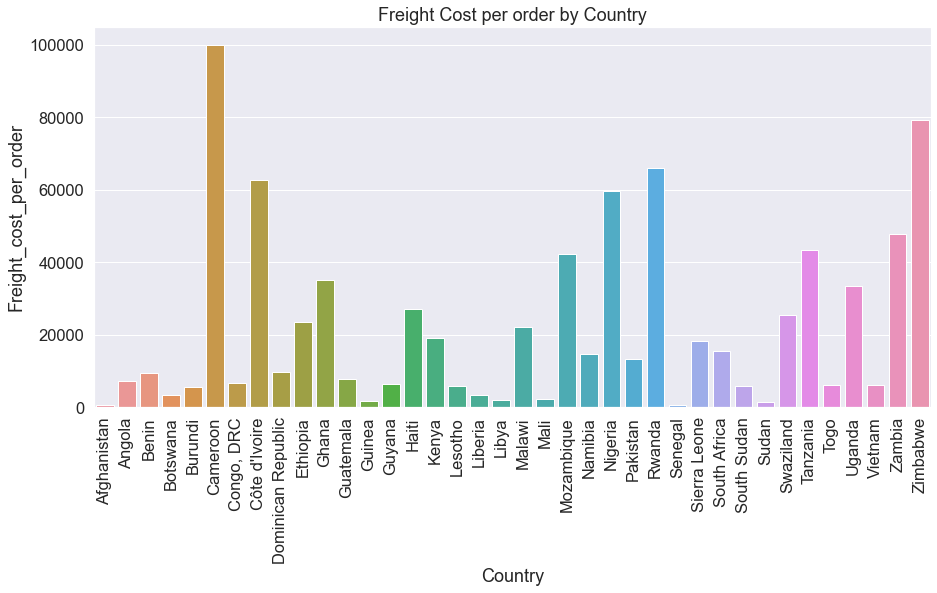

In [38]:
plt.figure(figsize=(15, 7))

sns.set(font_scale = 1.5, palette='dark')
axes = sns.barplot(data=country_summary, 
                   x='Country', 
                   y='Freight_cost_per_order', 
                   errorbar=None, 
                   estimator=sum)
plt.title('Freight Cost per order by Country')

plt.xticks(rotation='vertical')
plt.show()

#### Freight Cost per order by Shipment Mode

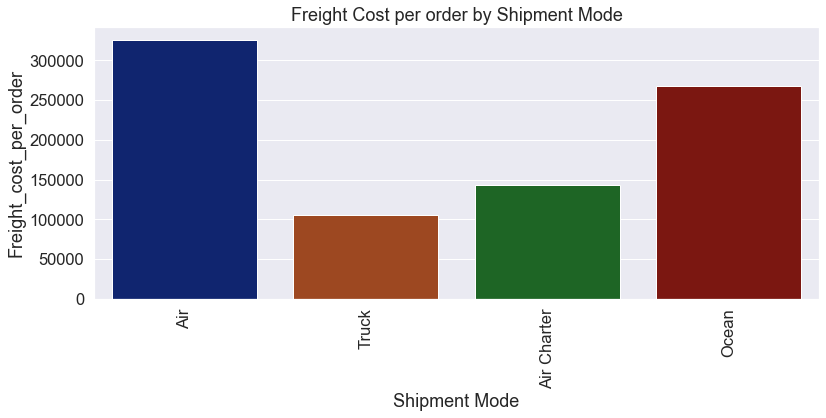

In [45]:
plt.figure(figsize=(13, 5))

sns.set(font_scale = 1.5, palette='dark')
axes = sns.barplot(data=country_summary, 
                   x='Shipment Mode', 
                   y='Freight_cost_per_order', 
                   errorbar=None, 
                   estimator=sum)
plt.title('Freight Cost per order by Shipment Mode')

plt.xticks(rotation='vertical')
plt.show()

####  Total Freight Cost (USD) by Top 10 Countries

In [40]:
total_freight = data.groupby(['Country'])['Freight Cost (USD)'].sum().nlargest(10).reset_index()
total_freight

,Country,Freight Cost (USD)
0,Nigeria,14227197.64
1,Zambia,6309186.49
2,Côte d'Ivoire,6092165.51
3,Rwanda,5890687.72
4,Uganda,5484292.24
5,Tanzania,4812951.90
6,Zimbabwe,4318000.86
7,Haiti,3999521.29
8,Mozambique,3277455.32
9,Vietnam,2735875.80


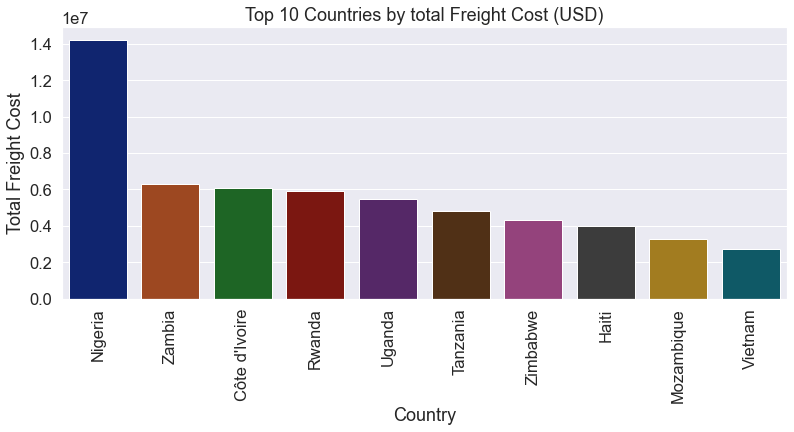

In [42]:
plt.figure(figsize=(13,5))

axes = sns.barplot(data=total_freight, 
                   x='Country',
                   y='Freight Cost (USD)')
plt.title('Top 10 Countries by total Freight Cost (USD)')


plt.xlabel('Country')
plt.ylabel('Total Freight Cost')

plt.xticks(rotation='vertical')
plt.show()   

#### Top 10 Manufacturing Site by Freight Cost (USD)

In [43]:
top_10_site_by_cost = manufacturing_summary[['Manufacturing Site', 'Freight Cost (USD)']].nlargest(10, 'Freight Cost (USD)')
top_10_site_by_cost

,Manufacturing Site,Freight Cost (USD)
8,"Aurobindo Unit III, India",1691
52,Mylan (formerly Matrix) Nashik,895
29,Hetero Unit III Hyderabad IN,484
16,"Cipla, Goa, India",382
6,"Alere Medical Co., Ltd.",360
71,"Strides, Bangalore, India.",320
72,"Trinity Biotech, Plc",305
4,ABBVIE Ludwigshafen Germany,277
34,Inverness Japan,261
1,ABBVIE (Abbott) Logis. UK,125


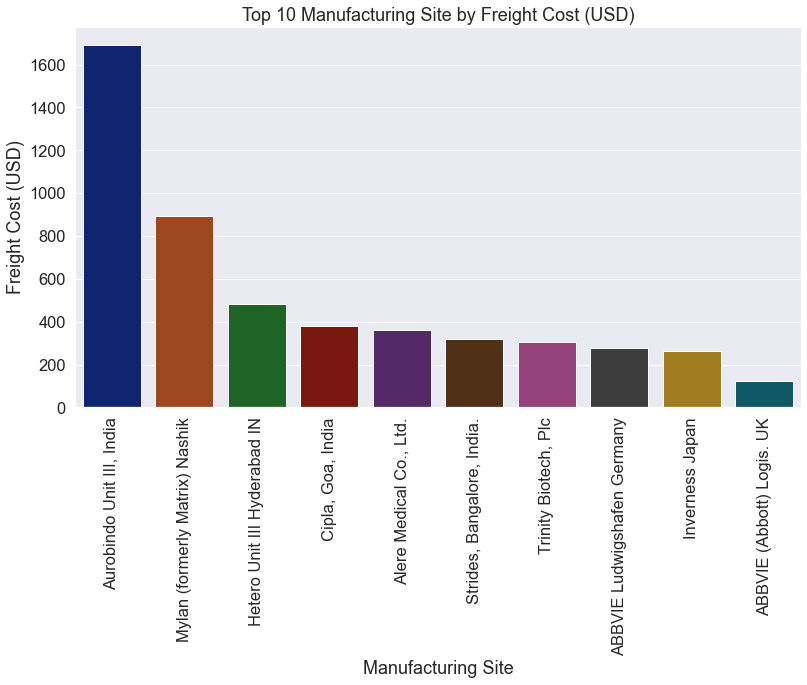

In [44]:
plt.figure(figsize=(13, 7))

axes = sns.barplot(data=top_10_site_by_cost, 
                   x='Manufacturing Site', 
                   y='Freight Cost (USD)')

plt.title('Top 10 Manufacturing Site by Freight Cost (USD)')
plt.xlabel('Manufacturing Site')
plt.xticks(rotation='vertical')
plt.show()